#### Broadcasting with NumPy Arrays

The term broadcasting refers to how NumPy treats arrays with different dimensions during arithmetic operations 
which lead to certain constraints, the smaller array is broadcast across the larger array so that they have 
compatible shapes.

### NumPy Array Broadcasting Algorithm

p = max(m, n)

if m < p:

    left-pad A's shape with 1s until it also has p dimensions
    
else if n < p:

    left-pad B's shape with 1s until it also has p dimensions
    
result_dims = new list with p elements

for i in p-1 ... 0:

    A_dim_i = A.shape[i]
    B_dim_i = B.shape[i]
    if A_dim_i != 1 and B_dim_i != 1 and A_dim_i != B_dim_i:
        raise ValueError("could not broadcast")
    else:
        # Pick the Array which is having maximum Dimension
        result_dims[i] = max(A_dim_i, B_dim_i)

In [1]:
import numpy as np
a = np.array([17, 11, 19]) # 1x3 Dimension array
print(a)
b = 3
print(b)

# Broadcasting happened because of
# miss match in array Dimension.
c = a + b 
print(c)


[17 11 19]
3
[20 14 22]


In [3]:
import numpy as np
A = np.array([[11, 22, 33], [10, 20, 30]])
print(A)

b = 4
print(b)

C = A + b
print(C)


[[11 22 33]
 [10 20 30]]
4
[[15 26 37]
 [14 24 34]]


In [12]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]]) #(4,3)
b = np.array([1.0, 2.0, 3.0])      #( 1,3)

print(a,'\n',b,'\n',a.shape,b.shape) # broadcasting happens result (4,3)

res=a*b
res

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]] 
 [1. 2. 3.] 
 (4, 3) (3,)


array([[ 0.,  0.,  0.],
       [10., 20., 30.],
       [20., 40., 60.],
       [30., 60., 90.]])

In [20]:
# no broadcasting example 
a=np.array([[  1.,   2.,   3.],
        [11.,  12.,  13.],
        [21.,  22.,  23.],
        [31.,  32.,  33.]])        #(4,3)
b = np.array([1.0, 2.0, 3.0, 4.0]) #(1,4) 
# res=a + b  Not possible because dim not match 

# solve this by transpose of b 
trans=a.T
trans
res=b+trans
res

array([[ 2., 13., 24., 35.],
       [ 3., 14., 25., 36.],
       [ 4., 15., 26., 37.]])

### Estimation of Variable

__Variability__: It is the import dimension that measures the data variation i.e. whether the data is spread out or 
tightly clustered. Also known as Dispersion When working on data sets in Machine Learning or Data Science, 
involves many steps – variance measurement, reduction, and distinguishing random variability from the real one. 
identifying sources of real variability, making decisions regarding the pre-processing choice or model selection based on it.

####  Terms related to Variability Metrics : 
* -> Deviation 
* -> Variance
* -> Standard Deviation
* -> Mean Absolute Deviation
* -> Median Absolute Deviation
* -> Order Statistics
* -> Range
* -> Percentile 
* -> Inter-quartile Range

__Deviation__: We can call it – errors or residuals also. 
It is the measure of how different/dispersed the values are, from the central/observed value. 

__Variance (s2)__: It is the best-known measure to estimate the variability as it is Squared Deviation. One can call it mean squared error as it is the average of standard deviation.

__Standard Deviation__: It is the square root of Variance. Is also referred to as __Euclidean Norm__.
<div>
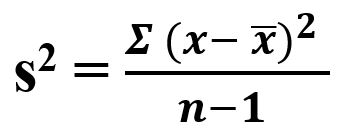
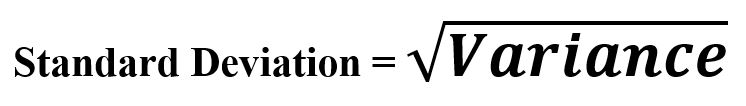
</div>

In [25]:
# Variance and sd

import numpy as np

Sequence = [2, 3, 5, 6, 7, 9]

var = np.var(Sequence)

print("Variance : ", var)
print("Sd :", np.std(Sequence))

# mathematically explaination

# Sequence : [2, 3, 5, 6, 7, 9] 
# Mean              = 5.33
# Total Terms, n    = 6
# Squared Deviation = (2 - 5.33)2 + (3 - 5.33)2 + (5 - 5.33)2
#                     (6 - 5.33)2 + (7 - 5.33)2 + (9 - 5.33)2
# Variance          = Squared Deviation / n
# sd                =sqrt(variance)

Variance :  5.5555555555555545
Sd : 2.357022603955158


__Mean Absolute Deviation__: One can estimate a typical estimation for these deviations. If we average the values, the negative deviations would offset the positive ones. Also, the sum of deviations from the mean is always zero. So, it is a simple approach to take the average deviation itself.

<div>
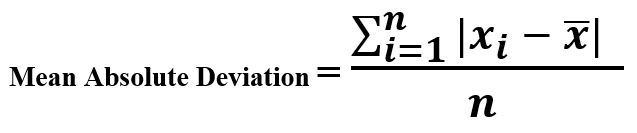
</div>


In [31]:
# mathematical exp

# Sequence : [2, 4, 6, 8] 
# Mean     = 5
# Deviation around mean = [-3, -1, 1, 3]

# Mean Absolute Deviation = (3 + 1 + 1 + 3)/ 4

Sequence = [2, 4, 6, 8] 

res=np.mean(np.absolute(Sequence-np.mean(Sequence)))
print(f'Absolute mean deviation :{res}')


Absolute mean deviation :2.0


In [74]:
from numpy import mean, absolute
data = [75, 69, 56, 46, 47, 79, 92, 97, 89, 88, 
        36, 96, 105, 32, 116, 101, 79, 93, 91, 112] 

# np.mean(np.absolute(data-np.mean(data))) # same results 
# mean(absolute(data-mean(data)))

20.055

In [83]:
import pandas as pd 

df=pd.DataFrame(data)
abs(df-df.mean()).mean()

0    20.055
dtype: float64

* The data set having a higher value of absolute mean deviation (or absolute deviation) has more variability.
* The data set with a lower value of absolute mean deviation (or absolute deviation) is preferable.
If there are two data sets with absolute mean values AMD1 and AMD2, and AMD1>AMD2 then the data in AMD1 is said to have more variability than the data in AMD2.
* __If the Absolute Mean Deviation (AMD) is higher, it suggests that the data points are more spread out from the mean, indicating higher variability or dispersion. In practical terms, higher AMD values often imply less consistency or stability in the dataset because the values deviate more from the central tendency (mean).__

__Median Absolute Deviation__: Mean Absolute Deviation, Variance, and Standard deviation (discussed in the previous section) are not robust to extreme values and outliers. We average the sum of deviations from the median. 
<div>
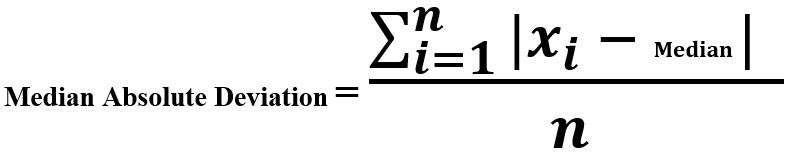
</div>


In [39]:



# Mathematically
# Sequence : [2, 4, 6, 8] 
# median     = 5
# Deviation around mean = [-3, -1, 1, 3]

# Mean Absolute Deviation = (3 + 1 + 1 + 3)/ 4
Sequence : [2, 4, 6, 8] 

res=np.median(np.absolute(Sequence-np.median(Sequence)))

print(f'median absolute deviation :{res}')

median absolute deviation :2.0


__Order Statistics__: This variability measurement approach is based on the spread of ranked (sorted) data.

__Range__: It is the most basic measurement belonging to Order Statistics. It is the difference between the largest and the smallest value of the dataset. It is good to know the spread of data but it is very sensitive to outliers. We can make it better by dropping the extreme values. 

In [40]:
# Sequence : [2, 30, 50, 46, 37, 91]
# Here, 2 and 91 are outliers

# Range = 91 - 2 = 89
# Range without outliers = 50 - 30 = 20

__Percentile__: It is a very good measure to measure the variability in data, avoiding outliers. The Pth percentile in data is a value such that atleast P% or fewer values are lesser than it and atleast (100 – P)% values are more than P.

__The Median is the 50th percentile of the data.__


In [22]:
# What is the 50th percentile for the given scores of 8 persons are 50, 100, 70, 80, 56, 60, 80, 75.

# Solution:

# sort the number : 50 56 60 70 75 80 80 100
# total numbers =8

# n is even so (70+75)/2=72.5

# for n odd follow below procedure

# sequence =50, 100, 70, 80, 56, 60, 75
# sort the number : 50 56 60 70 75 80  100

# 50%*7= 3.5~4

# the value at 4 is 70 
# hence in general meaning 50% of values in dataset are less than equal to 70 and remaining are greater than 70 

In [23]:
import numpy as np
arr1=[50, 100, 70, 80, 56, 60, 80, 75]
np.percentile(arr1,7)

52.94

In [24]:
# Percentile

import numpy as np

	
Sequence = [2, 30, 50, 46, 37, 91] 

print ("50th Percentile : ", np.percentile(Sequence, 50))
	
print ("60th Percentile : ", np.percentile(Sequence, 60))


50th Percentile :  41.5
60th Percentile :  46.0


__Inter-Quartile Range(IQR)__: It works for the ranked(sorted data). It has 3 quartiles dividing data – Q1(25th percentile), Q2(50th percentile), and Q3(75th percentile). Inter-quartile Range is the difference between Q3 and Q1. 

In [25]:
Sequence = [2, 30, 50, 46, 37, 91] 

Q1=np.percentile(Sequence,25)
Q2=np.percentile(Sequence,50)
Q3=np.percentile(Sequence,75)
print("IQR",Q3-Q1)

IQR 17.25


#### Operations on Numpy Arrays

__numpy.reciprocal()__ This function returns the reciprocal of argument, element-wise. 
For elements with absolute values larger than 1, the result is always 0 and for integer 0, overflow warning is issued.

In [27]:
arr=np.array([1,2,3,4,5],dtype='float') # dtype should be float if its integer it will be 0
np.reciprocal(arr)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])

In [28]:
arr = np.array([25, 1.33, 1, 1, 100]) 
np.reciprocal(arr)

array([0.04     , 0.7518797, 1.       , 1.       , 0.01     ])

In [31]:
np.power([1,2,3],[2,2,2])

array([1, 4, 9])

In [32]:
np.mod([5,10,15],10)

array([5, 0, 5], dtype=int32)

In [33]:
np.remainder([5,10,15],10)

array([5, 0, 5], dtype=int32)

In [35]:
np.divmod([5,10,15],10)

(array([0, 1, 1], dtype=int32), array([5, 0, 5], dtype=int32))

In [42]:
array = [[1, 3.4, 4.5], [3.45, 5.6, 9.8], 
         [2, 5, 6.3]]

print(array,'\n',np.sum(array))
print(np.sum(array,axis=0))
print(np.sum(array,axis=1))

[[1, 3.4, 4.5], [3.45, 5.6, 9.8], [2, 5, 6.3]] 
 41.05
[ 6.45 14.   20.6 ]
[ 8.9  18.85 13.3 ]


In [43]:
# Let’s try using the initial parameter to initialize our sum value. Essentially, 
# the initial value gets added to the sum of the elements of the array. 
# This is useful in certain problems utilizing counters.


array = [1.5, 3, 5.6]

np.sum(array,initial=3)

13.1

In [47]:
# Import NumPy Library
import numpy as np

# Initialize our array
array = np.ones(250, dtype=np.int8)

# Call our sum() function with a specified
# accumulator type
print(np.sum(array, dtype=np.int8))

# Expected Output: 250 
# result is -6 because the output value is out of bounds

-6


In [48]:
arr1 = [2, 27, 2, 21, 23] 
arr2 = [2, 3, 4, 5, 6] 
np.divide(arr1,arr2)

array([1.        , 9.        , 0.5       , 4.2       , 3.83333333])

In [49]:
np.divide(arr1,3)

array([0.66666667, 9.        , 0.66666667, 7.        , 7.66666667])

In [55]:
arr1 = [2, 27, 2, 21, 23,0,1,0] 
arr2 = [2, 3, 0, 5, 6,3,0,0] 
np.divide(arr1,arr2)

C:\Users\akash\AppData\Local\Temp\ipykernel_5328\2763528478.py:3: RuntimeWarning: divide by zero encountered in divide
  np.divide(arr1,arr2)
C:\Users\akash\AppData\Local\Temp\ipykernel_5328\2763528478.py:3: RuntimeWarning: invalid value encountered in divide
  np.divide(arr1,arr2)


array([1.        , 9.        ,        inf, 4.2       , 3.83333333,
       0.        ,        inf,        nan])

In [52]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
np.divide(x1, x2)

C:\Users\akash\AppData\Local\Temp\ipykernel_5328\3633022146.py:3: RuntimeWarning: divide by zero encountered in divide
  np.divide(x1, x2)
C:\Users\akash\AppData\Local\Temp\ipykernel_5328\3633022146.py:3: RuntimeWarning: invalid value encountered in divide
  np.divide(x1, x2)


array([[nan, 1. , 1. ],
       [inf, 4. , 2.5],
       [inf, 7. , 4. ]])

#### numpy.inner()

<div>
    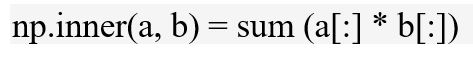
</div>

In [57]:
a = np.array([1,2,3])
b = np.array([0,1,0])
np.inner(a, b)

2

In [17]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])

print(np.inner(a,b))  # inner!= a*b !=dot
print(np.multiply(a,b))
print(a.dot(b))
print(np.outer(a,b))  # one multiplied to all elemnts in other matrix and so on 


[[17 23]
 [39 53]]
[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]
[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]


In [68]:
# Python Program illustrating 
# numpy.inner() method 
# 1D array 
vector_a = 2 + 3j
vector_b = 4 + 5j

product = np.inner(vector_a, vector_b) 
print("inner Product : ", product) 


inner Product :  (-7+22j)


In [85]:
np.gcd([12,4,5,6],[1,2,3,4])

array([1, 2, 1, 2])

#### Linear Algebra

In [16]:
import numpy.linalg as LA
import numpy as np

a = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])

ac = np.array([[1, -2j], [2j, 5]])

print(f'Rank of array :{a.ndim}')
print(f'Trace of array :{np.trace(a)}')  # trace is sum along  the daigonal
print(f'Determinate of matrix /array :{LA.det(a)} or it can be {np.linalg.det(a)}')
print(f'inverse of matrix /array :{LA.inv(a)} "\n" OR it can be: "\n" {np.linalg.inv(a)}')
print(f'eigen values : {np.linalg.eigvals(a)}')  # Compute the eigenvalues of a general matrix.
print(np.linalg.eigh(a))# This function is used to return the eigenvalues and eigenvectors of a complex Hermitian 
                        #  (conjugate symmetric) or a real symmetric matrix.Returns two objects, a 1-D array containing the 
                        #  eigenvalues of a, and a 2-D square array or matrix (depending on the input type) of the corresponding 
                        #  eigenvectors (in columns).
            
print(np.linalg.eig(a)) # This function is used to compute the eigenvalues and right eigenvectors of a square array.
print(np.linalg.eigvalsh(a)) #same as eigh but no vector only eign values

#  A matrix is said to be symmetric when matriix A(T)==A means teanspose of matrix equals A 
#  assyemtric matrix A(T)!=A

Rank of array :2
Trace of array :11
Determinate of matrix /array :-306.0 or it can be -306.0
inverse of matrix /array :[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]] "
" OR it can be: "
" [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]
eigen values : [11.24862343  5.09285054 -5.34147398]
(array([-7.15957544,  4.56008699, 13.59948845]), array([[ 0.192948  , -0.86902847, -0.45558818],
       [-0.86570993,  0.06778288, -0.49593528],
       [ 0.46186296,  0.49009693, -0.739248  ]]))
(array([11.24862343,  5.09285054, -5.34147398]), array([[ 0.24511338,  0.75669314,  0.02645665],
       [ 0.40622202, -0.03352363, -0.84078293],
       [ 0.88028581, -0.65291014,  0.54072554]]))
[-7.15957544  4.56008699 13.59948845]


|Feature|eig|eigh|
|:------|:----|:----|
|Can be used with non-symmetric matrices| Yes | No |
|Guarantees that eigenvalues are returned in ascending order|No|Yes|
|Typically faster|No|Yes|

In [14]:
# dot product normal and complex

vector_a = 2 + 3j
vector_b = 4 + 5j

print(np.dot(vector_a,vector_b))    # vector_a*vector_b
print(np.vdot(vector_a,vector_b))   # vector_a* vector_b.conjugate()

(-7+22j)
(23-2j)


__numpy.linalg.solve()__: Solve a linear matrix equation, or system of linear scalar equations.
    Computes the “exact” solution, x, of the well-determined, i.e., full rank, linear matrix equation ax = b.
    


In [31]:
a = np.array([[1, 2], [3, 4]])
b = np.array([8, 18])
# np.linalg.solve(a,b) # 1x+2y=8 and 3x+4y=18 now solve for x and y only for linear equations
np.linalg.solve(a,b)



array([2., 3.])

__numpy.linalg.lstsq() :__

__The parameters of the function are:__

* A: (array_like) : The coefficient matrix.
* B: (array_like) : The coordinate matrix. If this matrix is 2 dimensional then the least square solutions are calculated for each of the columns of B.
* rcond(float, optional): This is used to nullify the smaller or lesser values in A. This parameter raises a FutureWarning if not specified, hence we can specify it to “None” so that the warning is suppressed.

__The function returns four values. They are as follows:__

* R :(data_type=ndarray): This matrix contains the least square solutions of the system of linear equations.
* residuals:(data_type=ndarray) This matrix contains the sum of the squared residuals.
* RANK: (data_type=int) This variable represents the rank of the matrix returned by the function.
* Sing:(data_type=ndarray) The singular values of matrix A are stored in this array.
* The function raises LinAlgError if the computations diverge.

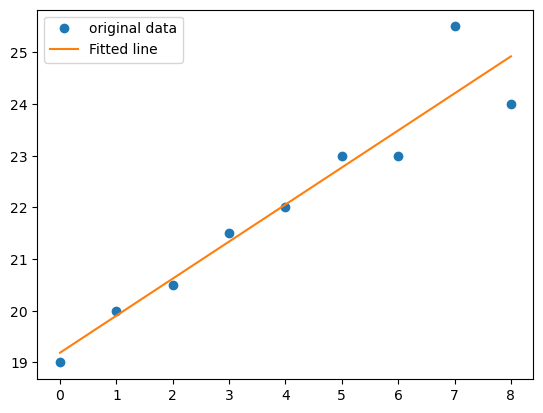

the least square solutions are' [ 0.71666667 19.18888889]
the residuals are= [2.90555556]
The singular values of the coefficient matrix are= [14.50633907  1.60191348]
the rank of the matrix is 2


In [47]:
import numpy as np
import matplotlib.pyplot as plt
 
# x co-ordinates
x = np.arange(0, 9)
A = np.array([x, np.ones(9)])
 
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
# obtaining the parameters of regression line
R,residuals,RANK,sing = np.linalg.lstsq(A.T, y, rcond=None) 
 
# plotting the line
plt.plot(x,y,'o',label="original data")
plt.plot(x,R[0]*x+R[1],label='Fitted line') # plting linefor valyues from x and y as per linalg.lstsqr  
plt.legend()

plt.show()

print("the least square solutions are'",R)
print("the residuals are=",residuals)
print("The singular values of the coefficient matrix are=",sing)
print("the rank of the matrix is",RANK)

In [48]:
#  many more fnctions this is basic  explore

#### QR factorization

* QR factorization of a matrix is the decomposition of a matrix say ‘A’ into ‘A=QR’ where Q is orthogonal and R is an upper-triangular matrix. We factorize the matrix using numpy.linalg.qr() function.

<div>
    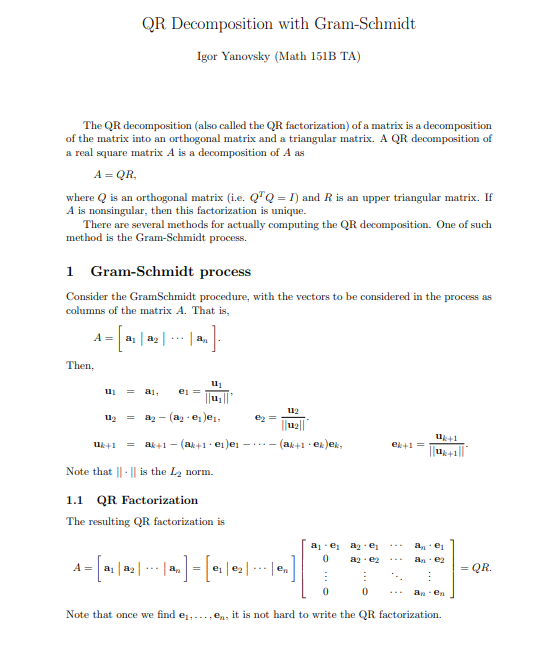
    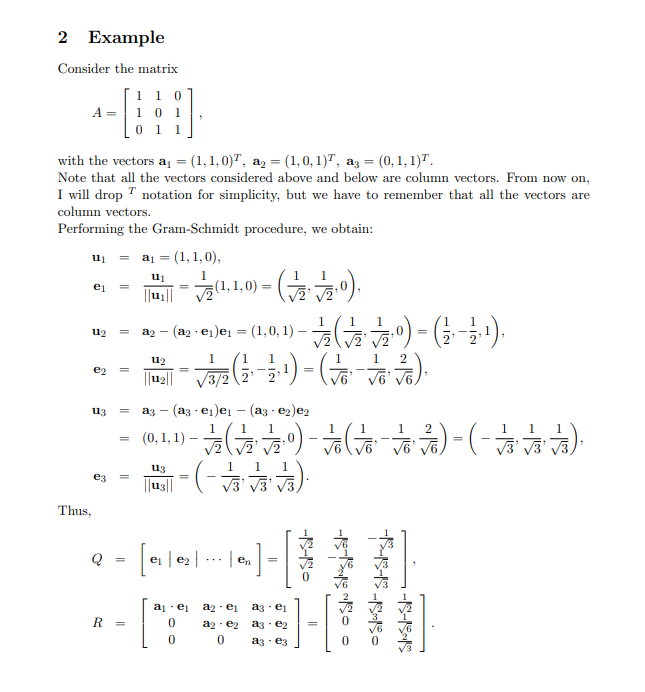
 </div>      
        


In [53]:
arr = np.array([[10,22],[13,6]]) 
q,r=np.linalg.qr(arr)
q,r

(array([[-0.60971076, -0.79262399],
        [-0.79262399,  0.60971076]]),
 array([[-16.40121947, -18.16938067],
        [  0.        , -13.7794632 ]]))

In [56]:
q.dot(r)   # here we will get q and r array in which we will obtain the array A by their dot product 
# QR Decomposition with Gram-Schmidt

array([[10., 22.],
       [13.,  6.]])

QR decomposition is a method for breaking down a matrix into two matrices: Q, an orthogonal matrix, and R, an upper triangular matrix. It is used for:

* Solving linear systems of equations
* Computing eigenvalues and eigenvectors of a matrix
* Solving least squares problems
* Finding eigenvalues 

In [58]:
arr = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

q,r=np.linalg.qr(arr)
q,r

(array([[-0.12309149,  0.90453403,  0.40824829],
        [-0.49236596,  0.30151134, -0.81649658],
        [-0.86164044, -0.30151134,  0.40824829]]),
 array([[-8.12403840e+00, -9.60113630e+00, -1.10782342e+01],
        [ 0.00000000e+00,  9.04534034e-01,  1.80906807e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.11164740e-15]]))

#### How to get the magnitude of a vector in NumPy?

*  if V is vector such that, V = (a, b, c)
*  then ||V|| = ?(a*a + b*b + c*c)

In [62]:
v=np.array([[1,2],[3,4]])
np.sqrt(np.sum(np.power(v,2)))

5.477225575051661

In [64]:
# in linelag use norm as below 

np.linalg.norm(v)  #  same af finding the magnitued for a vector

5.477225575051661

In [77]:
np.linalg.norm(v,ord=1)  # check documention for norm finding in order

6.0

#### NumPy and Random Data

__ranf()__:  is one of the function for doing random sampling in numpy. It returns an array of specified shape and fills it with random floats in the half-open interval [0.0, 1.0)

__Syntax__ : numpy.random.ranf(size=None)

In [101]:
np.random.ranf(size=(2,3))

array([[0.67741371, 0.38658277, 0.84873001],
       [0.72476757, 0.63275004, 0.75106193]])

In [109]:
np.random.ranf()

0.6838394794494025

In [110]:
np.random.ranf((3,3,2))

array([[[0.23117413, 0.62081155],
        [0.83969801, 0.55644278],
        [0.93338708, 0.79261247]],

       [[0.18857257, 0.18926514],
        [0.42654498, 0.68695492],
        [0.27115404, 0.66466367]],

       [[0.3514177 , 0.30835039],
        [0.67696387, 0.22961783],
        [0.65542112, 0.28352505]]])

__numpy.random.random()__ is one of the function for doing random sampling in numpy. It returns an array of specified shape and fills it with random floats in the half-open interval [0.0, 1.0).

In [138]:
np.random.random(size=(2,3))

array([[0.31307866, 0.85238833, 0.2236465 ],
       [0.18446843, 0.53788203, 0.55281711]])

In [139]:
np.random.random_sample((2,3,4))

array([[[0.23776135, 0.10709253, 0.64477228, 0.9673341 ],
        [0.5714105 , 0.27708003, 0.65875597, 0.6605218 ],
        [0.11974044, 0.92548735, 0.4517821 , 0.37982161]],

       [[0.36839269, 0.91494833, 0.03717683, 0.260841  ],
        [0.69489059, 0.11028525, 0.81900895, 0.63540087],
        [0.55159529, 0.04869886, 0.92952329, 0.21911929]]])

In [145]:
np.random.random_sample()

0.8119253365496273

__numpy.random.sample()__: is one of the functionsgenerate that generates floating-point values in an open interval [0.0,1.0). It doesn’t take up any arguments and produces a single random value each time it’s called. This function is often used for statistical and simulation tasks in Python.

In [148]:
np.random.sample((2,3,4))

array([[[0.35379311, 0.53191618, 0.033614  , 0.32728967],
        [0.51747178, 0.43896857, 0.56854366, 0.23569764],
        [0.87060438, 0.30185639, 0.9594995 , 0.99271644]],

       [[0.5113547 , 0.06333206, 0.75078745, 0.25649183],
        [0.81568623, 0.87505408, 0.90663317, 0.08677434],
        [0.64235696, 0.36199816, 0.17787049, 0.3518553 ]]])

In [149]:
# np.random.random, np.random.ranf , np.random.rand_sample(),np.random.sample()  are same 

__numpy.random.randint()__ is one of the function for doing random sampling in numpy. It returns an array of specified shape and fills it with random integers from low (inclusive) to high (exclusive), i.e. in the interval __[low, high).__

__Syntax__ : numpy.random.randint(low, high=None, size=None, dtype=’l’)

In [174]:
np.random.randint(2,7,size=(2,3))

array([[2, 5, 3],
       [3, 5, 4]])

#### numpy.random.choice()

__Syntax__ : numpy.random.choice(a, size=None, replace=True, p=None)

In [255]:
a=[0,6,2,3,4,5,6,7]
np.random.choice(a,(2,4),replace=False,p=[0.2,0.2,0.1,.1,.1,.1,.1,.1])  # p is probability of all the elemtns in a 

array([[6, 7, 0, 3],
       [6, 4, 2, 5]])

In [268]:
np.random.choice(5,4,replace=False)

array([0, 2, 3, 1])

In [301]:
a=np.random.choice(5, 1000, p =[0.1, 0.1, 0.3, 0.4, 0.1])

In [303]:
np.bincount(a) # counts each eelmts number of times is has repeated

array([ 84, 104, 275, 424, 113], dtype=int64)

#### numpy.random.shuffle()

In [311]:
a=np.array([1,2,3,4,5,6])

np.random.shuffle(a)   # changes willl be inplace and hence it will return None when you pint instead print original array
a

array([5, 3, 1, 2, 6, 4])

In [314]:
a=np.arange(16).reshape(4,4)
np.random.shuffle(a)
a

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15]])

__numpy.random.geometric()__ method, we can get the random samples of geometric distribution and return the random samples of numpy array by using this method.

<div>
    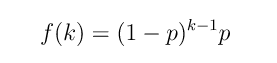
</div>

In [343]:
# Draw  Hundered values from the geometric distribution, with the probability of an individual success equal to 
# 0.35:
np.random.geometric(0.35,100)


array([ 3,  1,  1,  2,  3,  6,  2,  5,  2,  1,  1,  2,  8,  5,  2,  2,  7,
        1,  2,  2,  2,  1,  5,  8,  2,  3,  8,  9,  1,  1,  1,  2,  1,  2,
        1,  2,  1,  1,  3,  1, 11,  4,  3,  1,  2,  2,  2,  2,  3,  2,  2,
        1,  1,  1,  1,  2,  2,  1,  6,  2,  2,  2,  4,  4,  1,  1,  1,  1,
        1,  4,  1,  2,  6,  3,  2,  2,  2,  2,  1,  9,  1,  2,  1,  6,  1,
        1,  2,  1,  3,  1,  2,  1,  5,  3,  4,  1,  3,  5,  2,  1])

 __numpy.random.permutation()__

In [345]:
np.random.permutation(20) 

array([19,  2, 11,  9, 10,  4,  7, 14,  3, 16, 18, 13,  8, 15,  5,  0, 17,
        6, 12,  1])

In [347]:
a=np.array([1,2,3,4,5,6,7,8,9])
np.random.permutation(a)

array([2, 8, 6, 7, 3, 5, 9, 1, 4])

#### Searching in a NumPy array

In [350]:
a=np.array([1,2,3,4,5,6,7,8,9])
np.where(a<=2)

(array([0, 1], dtype=int64),)

In [356]:
a=np.array([1,2,3,4,5,6,7,8,9])
np.where(a<=5,a, 10*a)

array([ 1,  2,  3,  4,  5, 60, 70, 80, 90])

In [354]:
a=np.arange(16).reshape(2,4,2)
print(a)
print(np.where(a==12))

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]]
(array([1], dtype=int64), array([2], dtype=int64), array([0], dtype=int64))


In [434]:
a=np.array([1,2,3,4,5,6,7,8,9,0,0,9,0,0,0,0,-10])
np.argwhere(a)  # returns indicies of non zero elemts wise

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [11],
       [16]], dtype=int64)

__numpy.searchsorted()__: The function is used to find the indices into a sorted array arr such that, if elements are inserted before the indices, the order of arr would be still preserved. Here, a binary search is used to find the required insertion indices.

In [363]:
arr = np.array([10, 32, 30, 50, 20, 82, 91, 45]) 

print(np.searchsorted(arr,[32,20]))

[5 1]


In [364]:
np.searchsorted(arr,11) # it indicates that the value can be inserted at 1st indices in sorted array

1

In [368]:
np.searchsorted(arr,[-10,11,12,54])

array([0, 1, 1, 5], dtype=int64)

* Using np.sort() function
    * in-line sort
    * sorting along different axes

In [369]:
np.sort(arr)  

array([10, 20, 30, 32, 45, 50, 82, 91])

In [374]:
arr=np.random.randint(0,10,size=(2,5))
arr

array([[4, 7, 0, 7, 9],
       [4, 5, 7, 9, 9]])

In [383]:
np.sort(arr,axis=1)

array([[0, 4, 7, 7, 9],
       [4, 5, 7, 9, 9]])

In [384]:
np.sort(arr,axis=0)

array([[4, 5, 0, 7, 9],
       [4, 7, 7, 9, 9]])

In [415]:
a = np.array([[12, 15], [10, 1]])
np.sort(a,axis=None) # By default sort will be on last axis if you want to sort specify the axis if not sort will be last axis 

array([ 1, 10, 12, 15])

In [385]:
dtype = [('name', 'S10'), ('height', float), ('age', int)]
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),('Galahad', 1.7, 38)]
a = np.array(values, dtype=dtype)       # create a structured array
np.sort(a, order='height')  

array([(b'Galahad', 1.7, 38), (b'Arthur', 1.8, 41),
       (b'Lancelot', 1.9, 38)],
      dtype=[('name', 'S10'), ('height', '<f8'), ('age', '<i4')])

#### Using argsort()

In [398]:
arr=([10, 20, 100,101,102,1,1,30, 32, 45, 50, 82, 91])
np.argsort(arr)  #returns indices  of originalearray in which they can be sorted

array([ 5,  6,  0,  1,  7,  8,  9, 10, 11, 12,  2,  3,  4], dtype=int64)

#### Using np.lexsort() 

In [410]:
a = np.array([9, 3, 1, 3, 4, 3, 6]) 
 
b = np.array([4, 6, 9, 2, 1, 8, 7]) 
ind=np.lexsort((a,b))  # first sort by b then sort by a

np.array([(a[i],b[i]) for i in ind])

array([[4, 1],
       [3, 2],
       [9, 4],
       [3, 6],
       [6, 7],
       [3, 8],
       [1, 9]])

In [411]:
a = np.array([9, 3, 1, 3, 4, 3, 6]) 
 
b = np.array([4, 6, 9, 2, 1, 8, 7]) 
ind=np.lexsort((a,b))  # first sort by b then sort by a

np.array([(a[i],b[i]) for i in ind])

array([[4, 1],
       [3, 2],
       [9, 4],
       [3, 6],
       [6, 7],
       [3, 8],
       [1, 9]])

In [425]:
# numpy.argmax() : This function returns indices of the max element of the array in a particular axis.
# numpy.nanargmax() : This function returns indices of the max element of the array in a particular axis ignoring NaNs.
#                     The results cannot be trusted if a slice contains only NaNs and Infs.

a=np.array([4,5,8,9,12,1,1,2,1,1,2,1,100])
a[np.argmax(a)],a[np.argmin(a)]

a=np.array([4,5,8,9,12,1,1,2,1,1,2,1,100, np.nan])
print(np.argmax(a)) # this will print np.nan hence use np.nanargmax it will hnadle nan and inf in a array

(100, 1)

In [430]:
a=np.array([4,5,8,9,12,1,1,2,1,1,2,1,100,np.nan])
np.nanargmax(a),np.nanargmin(a),a[np.nanargmax(a)],a[np.nanargmin(a)]

(12, 5, 100.0, 1.0)

In [436]:
a=np.array([1,2,3,4,5,6,7,8,9,0,0,0,0])
np.nonzero(a)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),)

In [439]:
a=np.random.randint(0,11,size=(2,6))
a

array([[ 3,  6,  6,  0,  3,  9],
       [10,  8,  6,  1,  7,  1]])

In [440]:
np.flatnonzero(a)  # returns a array of indicies on non zero elemt as flattend array

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

#### numpy.count_nonzero() : Counts the number of non-zero values in the array .

In [450]:
a = np.count_nonzero([[0,1,7,0,0],[3,0,0,2,19]])
b = np.count_nonzero([[0,1,7,0,10],[3,0,0,2,19]], axis=1)
a,b

(5, array([3, 3], dtype=int64))

* __a.sort()__
    * Sorts the array in-place & returns None
    * Return type is None
    * Occupies less space. No copy created as it directly sorts the original array
    * Faster than sorted(a)
    
* __sorted(a)__
    * Creates a new list from the old & returns the new one, sorted
    * Return type is a list
    * Occupies more space as copy of original array is created and then sorting is done
    * Slower than a.sort()
* __np.argsort(a)__
    * Returns the indices that would sort an array
    * Return type is numpy array
    * Occupies space as a new array of sorted indices is returned
* __np.lexsort((b, a))__
    * Perform an indirect sort using a sequence of keys
    * Sort by a, then by b
    * Return type ndarray of ints Array of indices that sort the keys along the specified axis
    * Occupies space as a new array of sorted indices pair wise is returned.

#### numpy.sort_complex()

In [451]:
# function is used to sort a complex array.It sorts the array by using the real part first, then the imaginary part.

In [453]:
a=np.array([1,2,3,4,6,7,8100,0,3,4])
np.sort_complex(a)

array([0.0e+00+0.j, 1.0e+00+0.j, 2.0e+00+0.j, 3.0e+00+0.j, 3.0e+00+0.j,
       4.0e+00+0.j, 4.0e+00+0.j, 6.0e+00+0.j, 7.0e+00+0.j, 8.1e+03+0.j])

In [455]:
a=np.array([2 + 4j, 5 + 9j, 3 - 2j, 4 - 3j, 3 + 5j, 2-4j, 5])
a

array([2.+4.j, 5.+9.j, 3.-2.j, 4.-3.j, 3.+5.j, 2.-4.j, 5.+0.j])

In [456]:
np.sort_complex(a)

array([2.-4.j, 2.+4.j, 3.-2.j, 3.+5.j, 4.-3.j, 5.+0.j, 5.+9.j])

In [458]:
a=np.matrix('[4, 1; 12, 3]') 
np.sort(a),np.argsort(a)

(matrix([[ 1,  4],
         [ 3, 12]]),
 matrix([[1, 0],
         [1, 0]], dtype=int64))

In [3]:
import numpy as np
a = np.array([[0,1,7,0,0],[3,0,0,2,19]])
a

array([[ 0,  1,  7,  0,  0],
       [ 3,  0,  0,  2, 19]])

In [7]:
np.amax(a,axis=0),np.max(a),np.amin(a),np.min(a)

(array([ 3,  1,  7,  2, 19]), 19, 0, 0)

In [8]:
np.ptp(a) # returns value maximun-minumu

19

In [48]:
# Checkerboard pattern:

a=np.zeros(shape=(8,8), dtype='int')
a[1::2,::2]=1
a[::2,1::2]=1
print(a)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [52]:
l=[]
N=8
[list(np.tile((0,1),4)) if i%2==0 else (np.tile((1,0),4)) for i in range(N) ]

[[0, 1, 0, 1, 0, 1, 0, 1],
 array([1, 0, 1, 0, 1, 0, 1, 0]),
 [0, 1, 0, 1, 0, 1, 0, 1],
 array([1, 0, 1, 0, 1, 0, 1, 0]),
 [0, 1, 0, 1, 0, 1, 0, 1],
 array([1, 0, 1, 0, 1, 0, 1, 0]),
 [0, 1, 0, 1, 0, 1, 0, 1],
 array([1, 0, 1, 0, 1, 0, 1, 0])]